<a href="https://colab.research.google.com/github/Samuel1s/Markovian_Chain/blob/main/markovian_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Otimização II - Fila Markoviana

**Grupo:**
*   Emanuelle Fernanda
*   Gustavo Zille
*   Samuel Felipe
*   Vinícius França

### Problema

Otimizar o número de atendentes necessários em uma agência de Telemarketing.



### Solução Proposta

In [ ]:
import random

def sim_fila_markoviana(l, u, s, n_iteracoes, n_clientes_inicial=0):
  '''
  Simula uma fila de Markov.
  
  Parâmetros:
    l:                      taxa de entrada na fila.
    u:                      taxa de atendimento.
    s:                      número de atendentes.
    n_iteracoes:            duranção do experimento.
    n_clientes_inicial:     número inicial de clientes na fila.

  Saída:
    clientes_fila:          quantidade de clientes na fila, em cada iteração.
    clientes_atendimento:   quantidade de clientes sendo atendidos, em cada iteração.
    atendentes:             situação dos atendentes ao final das iterações.
    clientes_atendidos:     número total de clientes atendidos.
  '''

  clientes = n_clientes_inicial
  atendentes = []
  clientes_fila = []
  clientes_atendimento = []
  clientes_atendidos = 0

  for n in range(s):
    atendentes.append({'ocupado': False, 'tempo_ocioso': 0})

  for i in range(n_iteracoes):
    if random.uniform(0, 1) <= l:  # Probabilidade de alguém entrar na fila.
      clientes += 1

    for atendente in atendentes:
      if atendente['ocupado']:
        # Verifica se o atendimento foi encerrado.
        atendente['ocupado'] = (u >= random.uniform(0, 1))  # Probabilidade de o atendimento ter terminado.
                                                            # Quanto menor o "u", maior a prob. de terminar o atendimento.

      else:
        # Inicia o atendimento.
        if clientes > 0:
          clientes -= 1
          atendente['ocupado'] = True
          clientes_atendidos += 1

        # Registra ociosidade do atendente.
        else:
          atendente['tempo_ocioso'] += 1
  
    clientes_fila.append(clientes)
    clientes_atendimento.append(sum(x['ocupado'] for x in atendentes))

  return clientes_fila, clientes_atendimento, atendentes, clientes_atendidos

### Experimentos e Resultados

##############  Resultados  ####################
Tempo de operação:  100  instantes de tempo.
Taxa de atendimento:  0.1
Probabilidade de chegada de cliente:  0.5
Numero de atendentes:  2
Porcentagem de ociosidade dos atendentes. 0.43
Tempo de atendimento medio. 1.1296296296296295
################################################



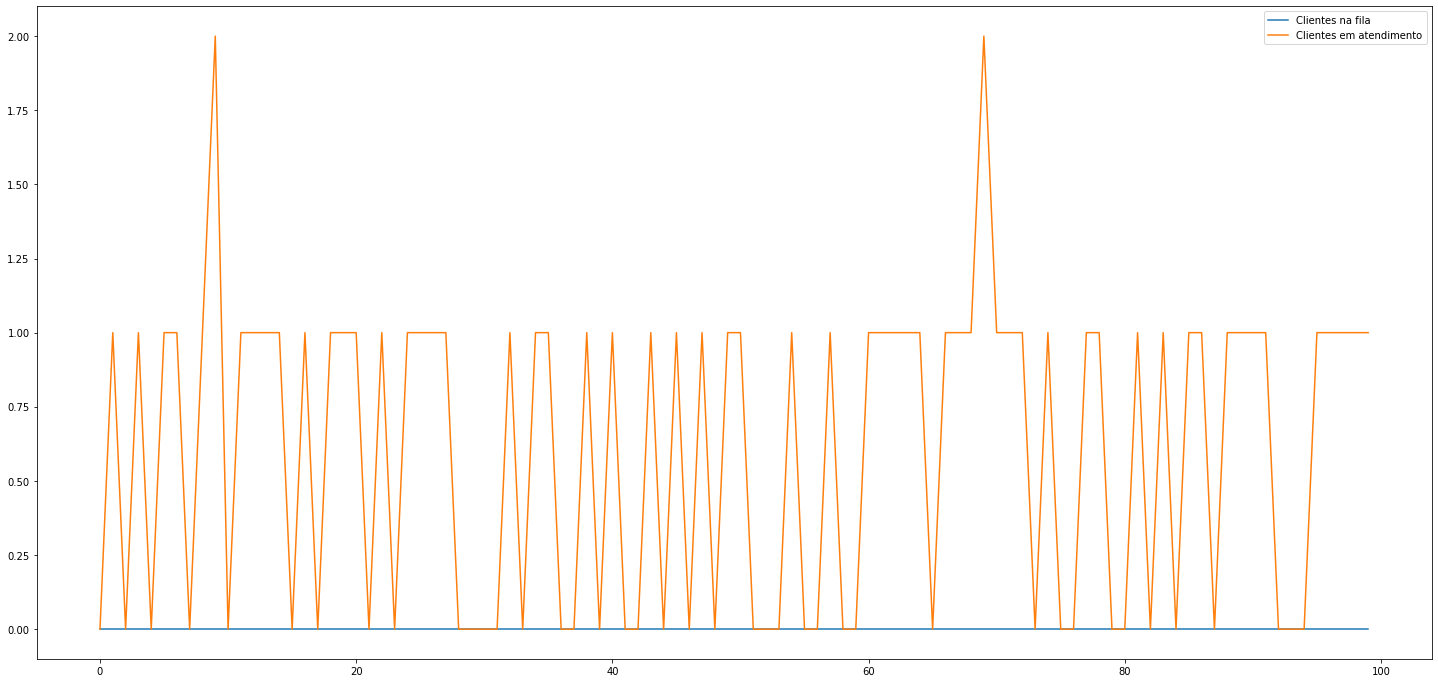

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

l = 0.5
u = 0.1
s = 2
n_iteracoes = 100

x_axis = list(range(n_iteracoes))
resp = sim_fila_markoviana(l, u, s, n_iteracoes, 0)

tempo_medio_ocioso = sum(atendente['tempo_ocioso'] for atendente in resp[2]) / (s * n_iteracoes)
tempo_medio_atendimento =  sum(resp[1]) / resp[3]

print("############## ", "Resultados", " ####################")
print("Tempo de operação: ", n_iteracoes, " instantes de tempo.")
print("Taxa de atendimento: ", u)
print("Probabilidade de chegada de cliente: ", l)
print("Numero de atendentes: ", s)
print("Porcentagem de ociosidade dos atendentes.", tempo_medio_ocioso)
print("Tempo de atendimento medio.", tempo_medio_atendimento)
print("################################################")
print()

plt.figure(figsize=(25, 12))
plt.plot(x_axis, resp[0], label='Clientes na fila')
plt.plot(x_axis, resp[1], label='Clientes em atendimento')
plt.legend()